In [1]:
import pandas as pd


In [2]:
df=pd.read_csv('Rathnapura_Production.csv')

In [3]:
df.head()

,Month,Production/Kg,Rainfall in mm,Rainy days nos,Sunshine hours,Fertilizer
0,2016-01-01,6114284.0,139.7,7.0,188.8,392.90
1,2016-02-01,5452146.0,88.9,10.0,194.9,417.46
2,2016-03-01,5424558.0,193.7,13.0,242.2,788.25
3,2016-04-01,6383458.0,396.5,24.0,216.5,425.30
4,2016-05-01,6552106.0,811.3,30.0,108.3,1056.48


In [4]:
df.tail()

,Month,Production/Kg,Rainfall in mm,Rainy days nos,Sunshine hours,Fertilizer
79,2022-08-01,4149531.0,529.8,21.0,168.0,1146.11
80,2022-09-01,4516375.0,212.1,15.0,NaN,1368.21
81,2022-10-01,4189250.0,685.5,25.0,NaN,1209.92
82,2022-11-01,4275937.0,342.0,16.0,NaN,1564.27
83,2022-12-01,4028472.0,234.9,14.0,NaN,1334.43


In [5]:
df.shape

(84, 6)

In [6]:
import numpy as np

In [7]:
df.columns


Index(['Month', 'Production/Kg', 'Rainfall in mm', 'Rainy days nos',
       'Sunshine hours', 'Fertilizer'],
      dtype='object')

In [8]:
df.dtypes

Month              object
Production/Kg     float64
Rainfall in mm    float64
Rainy days nos    float64
Sunshine hours    float64
Fertilizer        float64
dtype: object

In [9]:
df["Fertilizer"].mean()

2086.5125000000003

In [10]:
df["Sunshine hours"].mean()

167.82000000000002

In [11]:
df1=df.fillna(df["Sunshine hours"].mean())

In [12]:
df2=df1.fillna(df["Fertilizer"].mean())

In [13]:
df2.describe()

,Production/Kg,Rainfall in mm,Rainy days nos,Sunshine hours,Fertilizer
count,8.400000e+01,84.000000,84.000000,84.000000,84.000000
mean,5.473145e+06,308.965476,18.404762,167.820000,1721.047262
std,8.622616e+05,206.312019,7.033687,40.853282,1455.430265
min,3.193826e+06,0.000000,0.000000,82.300000,138.900000
25%,4.912158e+06,180.100000,13.000000,140.325000,416.877500
50%,5.544591e+06,235.750000,19.000000,167.820000,1416.685000
75%,6.103642e+06,413.775000,24.000000,193.300000,2535.575000
max,7.235867e+06,983.300000,30.000000,306.300000,5686.730000


In [14]:
data_train=df2.sample(frac=0.9,random_state=786)

In [15]:
data_train.shape

(76, 6)

In [16]:
data_train.head()

,Month,Production/Kg,Rainfall in mm,Rainy days nos,Sunshine hours,Fertilizer
37,2019-02-01,4970241.0,306.0,11.0,194.20,3038.58
82,2022-11-01,4275937.0,342.0,16.0,167.82,1564.27
44,2019-09-01,5229908.0,0.0,0.0,114.10,167.82
77,2022-06-01,4523300.0,232.5,24.0,151.00,524.06
13,2017-02-01,4006759.0,33.1,7.0,192.50,1641.40


In [17]:
data_test=df2.drop(data_train.index)

In [18]:
data_test.shape

(8, 6)

In [19]:
data_test.head()

,Month,Production/Kg,Rainfall in mm,Rainy days nos,Sunshine hours,Fertilizer
18,2017-07-01,6181624.0,183.7,20.0,190.90,2088.66
20,2017-09-01,6100094.0,611.7,26.0,95.90,2303.09
22,2017-11-01,5836389.0,509.1,21.0,103.40,1272.00
23,2017-12-01,5468586.0,243.1,15.0,167.82,167.82
30,2018-07-01,5987986.0,160.9,22.0,124.20,2545.43


## reset Index

In [20]:
data_train.reset_index(drop=True,inplace=True)

In [21]:
data_train.head()

,Month,Production/Kg,Rainfall in mm,Rainy days nos,Sunshine hours,Fertilizer
0,2019-02-01,4970241.0,306.0,11.0,194.20,3038.58
1,2022-11-01,4275937.0,342.0,16.0,167.82,1564.27
2,2019-09-01,5229908.0,0.0,0.0,114.10,167.82
3,2022-06-01,4523300.0,232.5,24.0,151.00,524.06
4,2017-02-01,4006759.0,33.1,7.0,192.50,1641.40


In [22]:
data_test.reset_index(drop=True,inplace=True)

In [23]:
data_test.head()

,Month,Production/Kg,Rainfall in mm,Rainy days nos,Sunshine hours,Fertilizer
0,2017-07-01,6181624.0,183.7,20.0,190.90,2088.66
1,2017-09-01,6100094.0,611.7,26.0,95.90,2303.09
2,2017-11-01,5836389.0,509.1,21.0,103.40,1272.00
3,2017-12-01,5468586.0,243.1,15.0,167.82,167.82
4,2018-07-01,5987986.0,160.9,22.0,124.20,2545.43


In [24]:
from pycaret.regression import *

In [28]:
reg=setup(data=data_train,target="Production/Kg",session_id=123)

,Description,Value
0,Session id,123
1,Target,Production/Kg
2,Target type,Regression
3,Original data shape,"(76, 6)"
4,Transformed data shape,"(76, 6)"
5,Transformed train set shape,"(53, 6)"
6,Transformed test set shape,"(23, 6)"
7,Numeric features,4
8,Categorical features,1
9,Preprocess,True


In [29]:
best=compare_models(exclude=["ransac"])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,686116.1985,714869678382.5144,830277.2911,-1.3921,0.1583,0.1342,0.0310
ada,AdaBoost Regressor,697017.0985,701679764046.1135,825933.4540,-1.6473,0.1573,0.1358,0.0240
knn,K Neighbors Regressor,700955.0375,704809988915.2000,827197.4188,-1.6522,0.1574,0.1364,0.0190
huber,Huber Regressor,705786.9597,698893844948.4738,825531.0834,-1.6807,0.1575,0.1386,0.0130
lar,Least Angle Regression,702208.7633,712545082547.4991,831840.2212,-1.6870,0.1585,0.1372,0.0140
llar,Lasso Least Angle Regression,702208.7633,712545082547.4980,831840.2212,-1.6870,0.1585,0.1372,0.0110
br,Bayesian Ridge,702208.7633,712545082547.4996,831840.2212,-1.6870,0.1585,0.1372,0.0120
omp,Orthogonal Matching Pursuit,702208.7633,712545082547.4991,831840.2212,-1.6870,0.1585,0.1372,0.0120
en,Elastic Net,702208.7633,712545082547.4976,831840.2212,-1.6870,0.1585,0.1372,0.0120
ridge,Ridge Regression,702208.7633,712545082547.3212,831840.2212,-1.6870,0.1585,0.1372,0.0130


In [30]:
ada=create_model("ada")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,709243.6667,737416125406.1250,858729.3668,-0.0491,0.1621,0.1396
1,666050.1667,544908184837.0443,738178.9653,-0.0456,0.1457,0.1354
2,514063.5556,427189465030.4910,653597.3264,-0.3150,0.1316,0.1095
3,732600.5417,726923708149.9374,852598.2103,-2.8377,0.1764,0.1669
4,678041.4889,497342173267.3014,705224.9097,-12.2265,0.1233,0.1117
5,636011.0400,701835165523.6003,837756.0298,-0.5382,0.1391,0.1010
6,607149.0222,494636351169.9456,703303.8825,-0.4165,0.1224,0.1020
7,677709.0222,718693446760.6962,847757.8940,-0.0278,0.1450,0.1165
8,929176.0810,1381137231762.7935,1175217.9507,-0.0131,0.2589,0.2166


In [31]:
tuned_ada=tune_model(ada)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,701748.4560,728883067946.1356,853746.4893,-0.0370,0.1608,0.1376
1,666501.6944,546655621323.0047,739361.6310,-0.0490,0.1459,0.1355
2,500367.7000,394905422117.9268,628415.0079,-0.2156,0.1268,0.1059
3,770277.4800,782279506897.3040,884465.6618,-3.1300,0.1822,0.1750
4,649782.0143,459507847850.4111,677870.0818,-11.2203,0.1182,0.1070
5,650466.1533,724731304109.0906,851311.5200,-0.5884,0.1417,0.1032
6,613567.5476,521961209851.5516,722468.8297,-0.4948,0.1258,0.1025
7,673207.4000,718292780271.3757,847521.5515,-0.0272,0.1448,0.1156
8,923223.0307,1375812117396.0591,1172950.1769,-0.0092,0.2587,0.2158


Fitting 10 folds for each of 10 candidates, totalling 100 fits


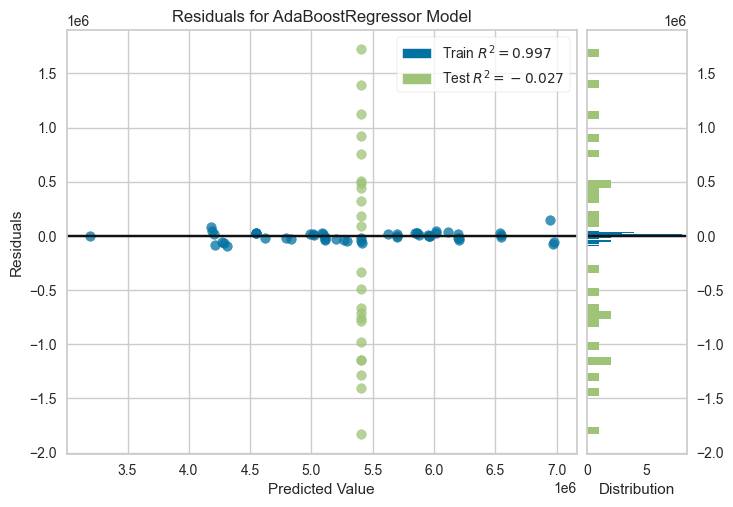

In [32]:
plot_model(tuned_ada)

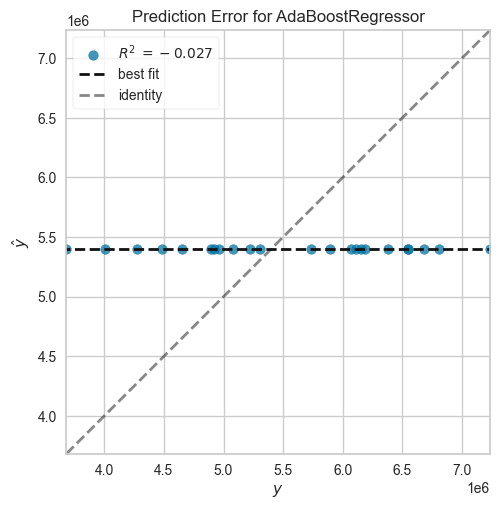

In [33]:
plot_model(tuned_ada,plot="error")

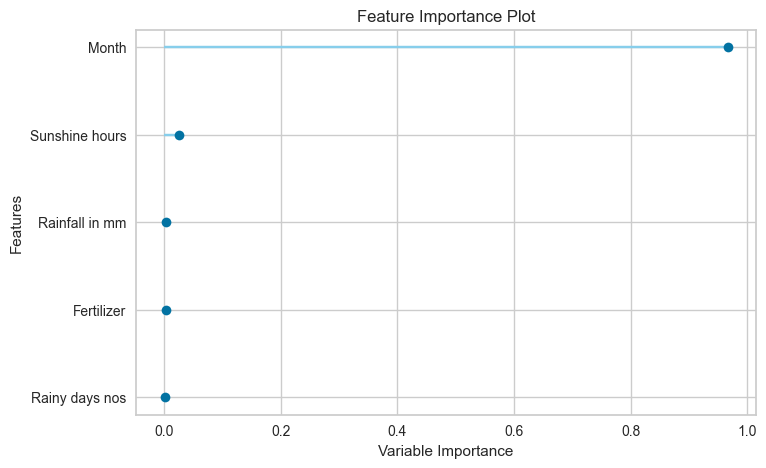

In [34]:
plot_model(tuned_ada,plot="feature")

In [35]:
predict_model(tuned_ada)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,AdaBoost Regressor,846995.3665,934517674177.6309,966704.5434,-0.0272,0.1795,0.1576


,Month,Rainfall in mm,Rainy days nos,Sunshine hours,Fertilizer,Production/Kg,prediction_label
53,2020-02-01,21.400000,6.0,306.299988,1562.660034,3681942.0,5.402302e+06
64,2016-12-01,163.899994,8.0,199.800003,167.820007,5736142.0,5.402302e+06
69,2016-06-01,220.399994,22.0,166.199997,1216.459961,6156702.0,5.402302e+06
4,2017-02-01,33.099998,7.0,192.500000,1641.400024,4006759.0,5.402302e+06
60,2019-11-01,348.899994,23.0,167.820007,167.820007,4484149.0,5.402302e+06
23,2017-01-01,38.700001,9.0,194.300003,1502.290039,4964228.0,5.402302e+06
29,2022-05-01,794.099976,28.0,124.000000,415.130005,5310105.0,5.402302e+06
61,2022-01-01,204.199997,13.0,237.000000,1030.989990,4897273.0,5.402302e+06
8,2019-01-01,37.500000,7.0,211.000000,1847.339966,5083644.0,5.402302e+06
73,2016-05-01,811.299988,30.0,108.300003,1056.479980,6552106.0,5.402302e+06


In [36]:
test_pred=predict_model(tuned_ada,data=data_test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,AdaBoost Regressor,685466.4643,609975691239.7192,781009.4053,-0.0868,0.1487,0.1286


In [37]:
test_pred.head()

,Month,Rainfall in mm,Rainy days nos,Sunshine hours,Fertilizer,Production/Kg,prediction_label
0,2017-07-01,183.699997,20.0,190.899994,2088.659912,6181624.0,5.402302e+06
1,2017-09-01,611.700012,26.0,95.900002,2303.090088,6100094.0,5.402302e+06
2,2017-11-01,509.100006,21.0,103.400002,1272.000000,5836389.0,5.402302e+06
3,2017-12-01,243.100006,15.0,167.820007,167.820007,5468586.0,5.402302e+06
4,2018-07-01,160.899994,22.0,124.199997,2545.429932,5987986.0,5.402302e+06


In [38]:
save_model(tuned_ada,"Regression Model-Ra")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Rainfall in mm', 'Rainy days nos',
                                              'Sunshine hours', 'Fertilizer'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Month'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('rest_encoding',
                  TransformerWrapper(include=['Month'],
                                     transformer=TargetEncoder(cols=['Month'],
                                                               handle_missing='return_nan'))),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('trained_model',
                  AdaBoostRegressor(learning_rate=0.4, loss='square',
                      

In [39]:
save_final_model=load_model("Regression Model-Ra")

Transformation Pipeline and Model Successfully Loaded


In [40]:
new_prediction=predict_model(save_final_model,data=data_test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,AdaBoost Regressor,685466.4643,609975691239.7192,781009.4053,-0.0868,0.1487,0.1286


In [41]:
new_prediction.head()

,Month,Rainfall in mm,Rainy days nos,Sunshine hours,Fertilizer,Production/Kg,prediction_label
0,2017-07-01,183.699997,20.0,190.899994,2088.659912,6181624.0,5.402302e+06
1,2017-09-01,611.700012,26.0,95.900002,2303.090088,6100094.0,5.402302e+06
2,2017-11-01,509.100006,21.0,103.400002,1272.000000,5836389.0,5.402302e+06
3,2017-12-01,243.100006,15.0,167.820007,167.820007,5468586.0,5.402302e+06
4,2018-07-01,160.899994,22.0,124.199997,2545.429932,5987986.0,5.402302e+06
